# Guided waves

In this homework, we are going to visualize the fields of guided waves to gain some intuition. We will start with examples of $TE_{10}$ wave and general $TE_{mn}$ waves, then you will apply similar methods to look at TM waves.

Suppose the wave guide extends along z. Monochromatic waves propagating down the tube have the generic form
$$\tilde{\mathbf{E}}(x,y,z,t)=\tilde{\mathbf{E}}_0(x,y,z,t)e^{i(kz-\omega t)}$$
$$\tilde{\mathbf{B}}(x,y,z,t)=\tilde{\mathbf{B}}_0(x,y,z,t)e^{i(kz-\omega t)}$$
Plugging these into Maxwell's equations in vacuum, we can obtain
$$E_{0x}=\frac{i}{(\omega/c)^2-k^2}\left(k\frac{\partial E_{0z}}{\partial x}+\omega\frac{\partial B_{0z}}{\partial y}\right)$$
$$E_{0y}=\frac{i}{(\omega/c)^2-k^2}\left(k\frac{\partial E_{0z}}{\partial y}-\omega\frac{\partial B_{0z}}{\partial x}\right)$$
$$B_{0x}=\frac{i}{(\omega/c)^2-k^2}\left(k\frac{\partial B_{0z}}{\partial x}-\frac{\omega}{c^2}\frac{\partial E_{0z}}{\partial y}\right)$$
$$B_{0y}=\frac{i}{(\omega/c)^2-k^2}\left(k\frac{\partial B_{0z}}{\partial y}+\frac{\omega}{c^2}\frac{\partial E_{0z}}{\partial x}\right)$$
and
$$\left(\frac{\partial^2}{\partial x^2}+\frac{\partial^2}{\partial y^2}+(\omega/c)^2-k^2\right)E_z=0$$
$$\left(\frac{\partial^2}{\partial x^2}+\frac{\partial^2}{\partial y^2}+(\omega/c)^2-k^2\right)B_z=0$$
For TE waves, the general solution for $B_{0z}$ is
$$B_{0z}=B_0\cos(m\pi x/a)\cos(n\pi y/b)$$
with 
$$k=\sqrt{(\omega/c)^2-\pi^2[(m/a)^2+(n/b)^2]}$$
It can be seen that for a propagating wave, we need $\omega>c\pi\sqrt{(m/a)^2+(n/b)^2}\equiv\omega_{mn}$, where $\omega_{mn}$ is the cutoff frequency for $TE_{mn}$ wave. Then we have
$$k=\frac{1}{c}\sqrt{\omega^2-\omega_{mn}^2}$$

## $TE_{10}$ wave

**Exercise 1**: Let $m=1$ and $n=0$. Show that the real fields of the $TE_{10}$ wave are the following:
$$B_z=B_0\cos\left(\frac{\pi x}{a}\right)\cos(kz-\omega t)$$
$$B_x=\frac{k a}{\pi}B_0\sin\left(\frac{\pi x}{a}\right)\sin(kz-\omega t)$$
$$E_y=-\frac{\omega a}{\pi}B_0\sin\left(\frac{\pi x}{a}\right)\sin(kz-\omega t)$$
$$E_x=E_z=B_y=0$$
Notice that the fields are independent of $y$. We are going to visualize the fields on the $xz$ plane.

### Respond:
Proof included in pdf of analytical answers.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

We assume the widths of the wave guide are $a=2$ and $b=1$ in the x and y direction, respectively. The following code segment sets up the grid.

In [5]:
a=2
b=1
zmax=6
nx=200
nz=600

x0=np.linspace(0,a,nx+1)
z0=np.linspace(0,zmax,nz+1)

# xz grid
zz,xx=np.meshgrid(z0,x0)

We first calculate the cutoff frequency $\omega_{mn}=c\pi\sqrt{(m/a)^2+(n/b)^2}$. In the code we assume the speed of light $c=1$.

In [6]:
wc=np.pi/a
print("cutoff frequency =",wc)

cutoff frequency = 1.5707963267948966


$TE_{10}$ waves must have $\omega>\omega_{mn}$ in order to propagate. We assume $\omega=1.5\omega_{mn}$. 

In [7]:
w=1.5*wc
k=np.sqrt(w**2-wc**2)
print("k =",k)

k = 1.7562036827601817


The following code segment sets up the array of the time points, which will be used for the animation later on.

In [8]:
nframe=60
t=np.linspace(0, 6, nframe+1)

Now we are going to make a plot on the $xz$ plane. The magnetic field only has $B_x$ and $B_z$ components, namely, it lies in the $xz$ plane. The electric field only has $E_y$ component, namely, it is perpendicular to the $xz$ plane. We are going to use `streamplot` to show the magnetic field on the $xz$ plane, and `pcolormesh` to show $E_y$. We show the plot at two different times $t=0$ and $t=0.3$. 

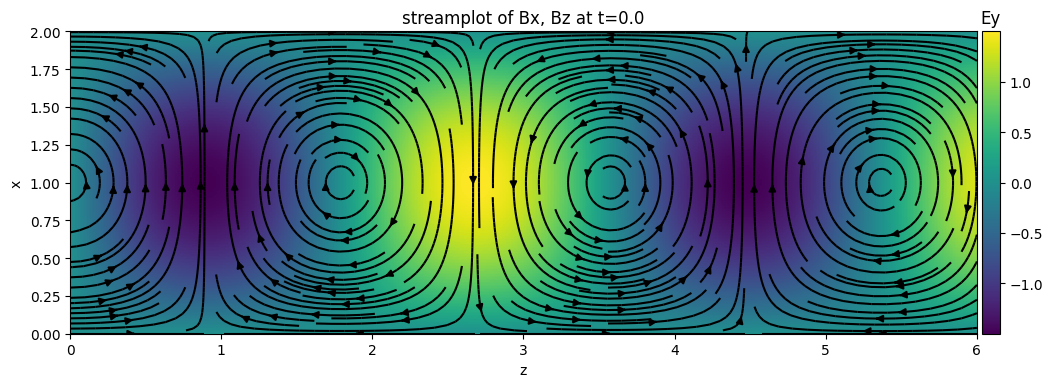

In [9]:
i=0
Bz=np.cos(np.pi*xx/a)*np.cos(k*zz-w*t[i])
Bx=k*a/np.pi*np.sin(np.pi*xx/a)*np.sin(k*zz-w*t[i])
Ey=-w*a/np.pi*np.sin(np.pi*xx/a)*np.sin(k*zz-w*t[i])
fig=plt.figure(figsize=(12,4))
ax=fig.add_subplot(111)
im=plt.pcolormesh(zz,xx,Ey)
stm=plt.streamplot(zz,xx,Bz,Bx,density=2,color='k')
ax.set_aspect('equal')
plt.xlabel("z")
plt.ylabel("x")
plt.xlim([0,zmax])
plt.ylim([0,a])
plt.title("streamplot of Bx, Bz at t=%.1f" % t[i])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.title('Ey')
plt.show()

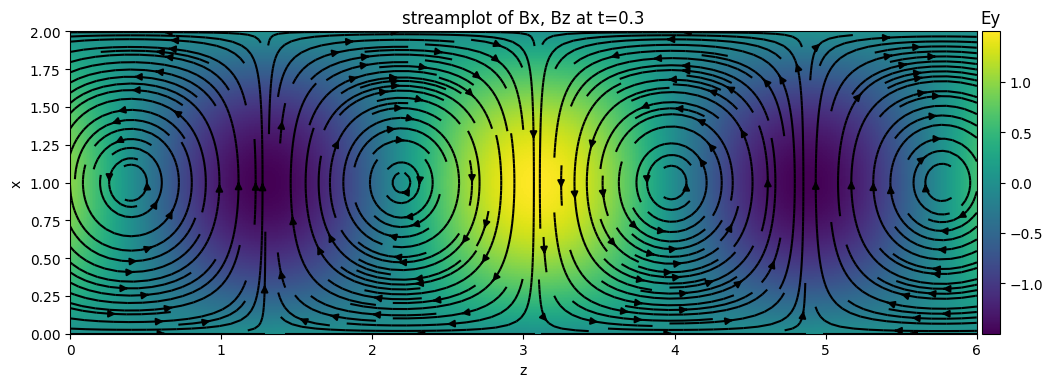

In [7]:
i=3
Bz=np.cos(np.pi*xx/a)*np.cos(k*zz-w*t[i])
Bx=k*a/np.pi*np.sin(np.pi*xx/a)*np.sin(k*zz-w*t[i])
Ey=-w*a/np.pi*np.sin(np.pi*xx/a)*np.sin(k*zz-w*t[i])
fig=plt.figure(figsize=(12,4))
ax=fig.add_subplot(111)
im=plt.pcolormesh(zz,xx,Ey)
stm=plt.streamplot(zz,xx,Bz,Bx,density=2,color='k')
ax.set_aspect('equal')
plt.xlabel("z")
plt.ylabel("x")
plt.xlim([0,zmax])
plt.ylim([0,a])
plt.title("streamplot of Bx, Bz at t=%.1f" % t[i])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.title('Ey')
plt.show()

The following code makes an animation. We first make a series of plots, then put these together into a movie. You need to have `ffmpeg` installed in order to make the movie.

In [10]:
import sys
import os
plotdir='./plot'
if not os.path.exists(plotdir):
    os.makedirs(plotdir)

In [12]:
for i in range(0,nframe+1):
    Bz=np.cos(np.pi*xx/a)*np.cos(k*zz-w*t[i])
    Bx=k*a/np.pi*np.sin(np.pi*xx/a)*np.sin(k*zz-w*t[i])
    Ey=-w*a/np.pi*np.sin(np.pi*xx/a)*np.sin(k*zz-w*t[i])
    fig=plt.figure(figsize=(12,4))
    ax=fig.add_subplot(111)
    im=plt.pcolormesh(zz,xx,Ey)
    stm=plt.streamplot(zz,xx,Bz,Bx,density=2,color='k')
    ax.set_aspect('equal')
    plt.xlabel("z")
    plt.ylabel("x")
    plt.xlim([0,zmax])
    plt.ylim([0,a])
    plt.title("streamplot of Bx, Bz at t=%.1f" % t[i])
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="2%", pad=0.05)
    plt.colorbar(im, cax=cax)
    plt.title('Ey')
    plt.tight_layout()
    plt.savefig(os.path.join(plotdir,'slice%03d.png' % (i))) # the plots are saved as ./plot/slice000.png, ./plot/slice001.png, etc
    plt.close()

In [13]:
!ffmpeg -y -f image2 -r 6 -i plot/slice%03d.png -c:v libx264 -crf 18 -pix_fmt yuv420p TE10xz.mp4
!rm plot/slice*

ffmpeg version 4.3.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 10.2.1 (GCC) 20200726
  configuration: --disable-static --enable-shared --enable-gpl --enable-version3 --enable-sdl2 --enable-fontconfig --enable-gnutls --enable-iconv --enable-libass --enable-libdav1d --enable-libbluray --enable-libfreetype --enable-libmp3lame --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libopus --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libsrt --enable-libtheora --enable-libtwolame --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libzimg --enable-lzma --enable-zlib --enable-gmp --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvo-amrwbenc --enable-libmysofa --enable-libspeex --enable-libxvid --enable-libaom --enable-libgsm --enable-librav1e --disable-w32threads --enable-libmfx --enable-ffnvcodec --enable-cuda-llvm --enable-cuvid --enable-d3d11va 

In the above command using `ffmpeg`, the option `-r 6` specifies the frame rate, `-i plot/slice%03d.png` specifies the input figure names, `TE10xz.mp4` at the end is the movie file name. Feel free to change these according to your needs. You do not need to change other options.

## General $TE_{mn}$ mode

**Exercise 2**: Show that for general $TE_{mn}$ waves, the real fields are
$$B_{z}=B_0\cos\left(\frac{m\pi x}{a}\right)\cos\left(\frac{n\pi y}{b}\right)\cos(kz-\omega t)$$
$$E_x=\frac{\omega}{\omega_{mn}^2/c^2}\left(\frac{n\pi}{b}\right)B_0\cos\left(\frac{m\pi x}{a}\right)\sin\left(\frac{n\pi y}{b}\right)\sin(kz-\omega t)$$
$$E_y=-\frac{\omega}{\omega_{mn}^2/c^2}\left(\frac{m\pi}{a}\right)B_0\sin\left(\frac{m\pi x}{a}\right)\cos\left(\frac{n\pi y}{b}\right)\sin(kz-\omega t)$$
$$B_x=\frac{k}{\omega_{mn}^2/c^2}\left(\frac{m\pi}{a}\right)B_0\sin\left(\frac{m\pi x}{a}\right)\cos\left(\frac{n\pi y}{b}\right)\sin(kz-\omega t)$$
$$B_y=\frac{k}{\omega_{mn}^2/c^2}\left(\frac{n\pi}{b}\right)B_0\cos\left(\frac{m\pi x}{a}\right)\sin\left(\frac{n\pi y}{b}\right)\sin(kz-\omega t)$$
and of course, $E_z=0$.

### Respond:
Proof included in pdf of analytical answers.

We first define a function to calculate the general fields.

In [14]:
a=2.0
b=1.0
def wc(m,n):
    return np.pi*np.sqrt((m/a)**2+(n/b)**2)
def fields(m,n,x,y,z,t,w):
    k=np.sqrt(w**2-wc(m,n)**2)
    Bz=np.cos(m*np.pi*x/a)*np.cos(n*np.pi*y/b)*np.cos(k*z-w*t)
    Ex=w/wc(m,n)**2*(n*np.pi/b)*np.cos(m*np.pi*x/a)*np.sin(n*np.pi*y/b)*np.sin(k*z-w*t)
    Ey=-w/wc(m,n)**2*(m*np.pi/a)*np.sin(m*np.pi*x/a)*np.cos(n*np.pi*y/b)*np.sin(k*z-w*t)
    Bx=k/wc(m,n)**2*(m*np.pi/a)*np.sin(m*np.pi*x/a)*np.cos(n*np.pi*y/b)*np.sin(k*z-w*t)
    By=k/wc(m,n)**2*(n*np.pi/b)*np.cos(m*np.pi*x/a)*np.sin(n*np.pi*y/b)*np.sin(k*z-w*t)
    return (Bz,Ex,Ey,Bx,By)

Now we are going to look at $TE_{11}$ mode.

Firstly, we plot fields on the z=const plane at t=0.

In [20]:
nx=200
ny=100

x0=np.linspace(0,a,nx+1)
y0=np.linspace(0,b,ny+1)

# xy grid
xz,yz=np.meshgrid(x0,y0)

The following plot shows $B_x$ and $B_y$ as stream lines and $B_z$ in color.

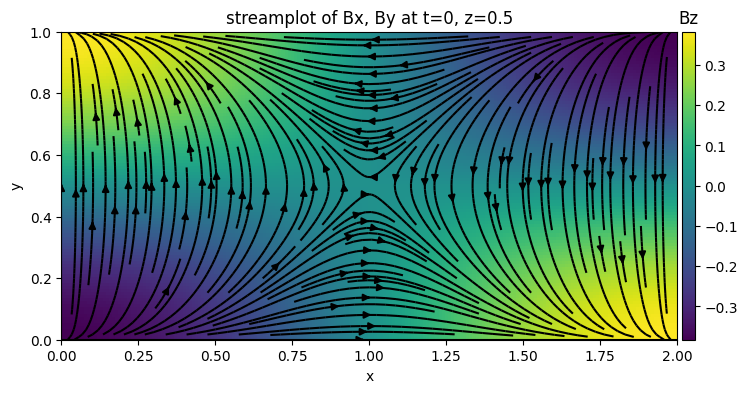

In [16]:
(Bz,Ex,Ey,Bx,By)=fields(1,1,xz,yz,0.5,0,1.5*wc(1,1))

fig=plt.figure(figsize=(9,4))
ax=fig.add_subplot(111)
im=plt.pcolormesh(xz,yz,Bz)
stm=plt.streamplot(xz,yz,Bx,By,density=2,color='k')
ax.set_aspect('equal')
plt.xlabel("x")
plt.ylabel("y")
plt.xlim([0,a])
plt.ylim([0,b])
plt.title("streamplot of Bx, By at t=0, z=0.5")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.title('Bz')
plt.show()

However, stream plot does not indicate the magnitude of the vector. In the following figure, arrows are shown for the B field component in the xy plane, with the length of the arrow indicating the magnitude of the in-plane magnetic field. $B_z$ is still shown in color.

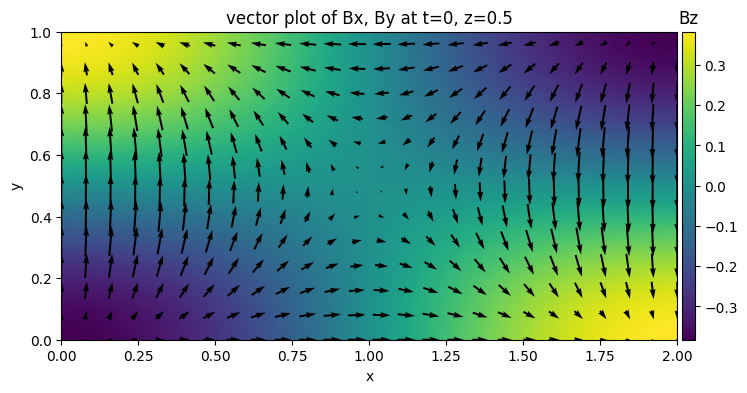

In [17]:
fig=plt.figure(figsize=(9,4))
ax=fig.add_subplot(111)
im=plt.pcolormesh(xz,yz,Bz)
step=8
plt.quiver(xz[::step,::step],yz[::step,::step],Bx[::step,::step],By[::step,::step],color='k',pivot='middle')
ax.set_aspect('equal')
plt.xlabel("x")
plt.ylabel("y")
plt.xlim([0,a])
plt.ylim([0,b])
plt.title("vector plot of Bx, By at t=0, z=0.5")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.title('Bz')
plt.show()

The following plot shows the stream line of the electric field.

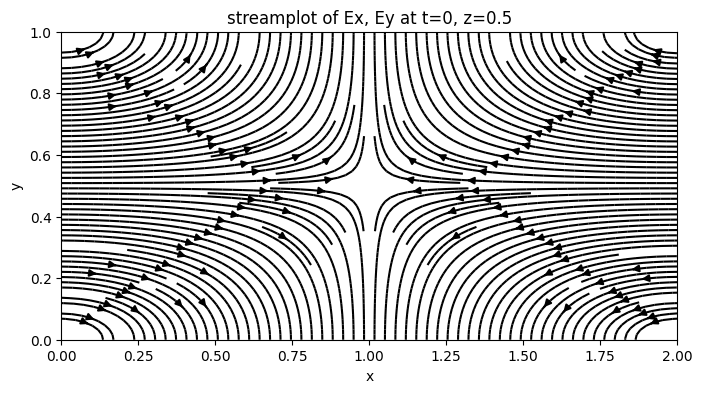

In [18]:
fig=plt.figure(figsize=(9,4))
ax=fig.add_subplot(111)
stm=plt.streamplot(xz,yz,Ex,Ey,density=2,color='k')
ax.set_aspect('equal')
plt.xlabel("x")
plt.ylabel("y")
plt.xlim([0,a])
plt.ylim([0,b])
plt.title("streamplot of Ex, Ey at t=0, z=0.5")
plt.show()

Similarly, we can do `quiver` plot for the E field:

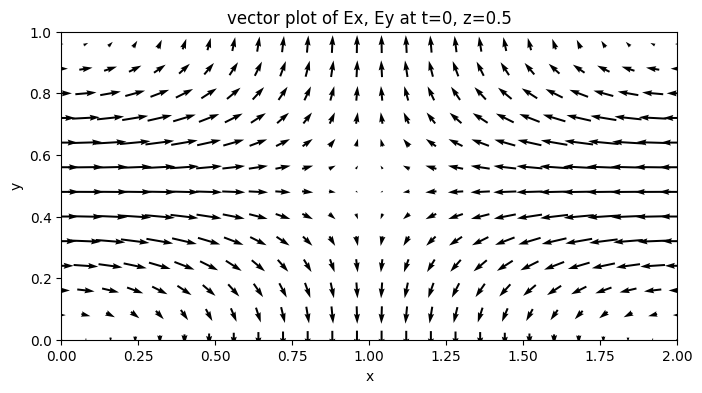

In [19]:
fig=plt.figure(figsize=(9,4))
ax=fig.add_subplot(111)
step=8
plt.quiver(xz[::step,::step],yz[::step,::step],Ex[::step,::step],Ey[::step,::step],color='k',pivot='middle')
ax.set_aspect('equal')
plt.xlabel("x")
plt.ylabel("y")
plt.xlim([0,a])
plt.ylim([0,b])
plt.title("vector plot of Ex, Ey at t=0, z=0.5")
plt.show()

In what follows, we make an animation of the magnetic field on the xy plane (namely, the z=0 plane).

In [20]:
nframe=60
t=np.linspace(0, 6, nframe+1)

for i in range(0,nframe+1):
    (Bz,Ex,Ey,Bx,By)=fields(1,1,xz,yz,0,t[i],1.5*wc(1,1))
    fig=plt.figure(figsize=(9,4))
    ax=fig.add_subplot(111)
    im=plt.pcolormesh(xz,yz,Bz,vmin=-1,vmax=1)
    step=8
    plt.quiver(xz[::step,::step],yz[::step,::step],Bx[::step,::step],By[::step,::step],color='k',pivot='middle',angles='xy', scale_units='xy', scale=5)
    ax.set_aspect('equal')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim([0,a])
    plt.ylim([0,b])
    plt.title("vector plot of Bx, By at t=%.1f, z=0" % t[i])
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="2%", pad=0.05)
    plt.colorbar(im, cax=cax)
    plt.title('Bz')
    plt.tight_layout()
    plt.savefig(os.path.join(plotdir,'slice%03d.png' % (i)))
    plt.close()

In [21]:
!ffmpeg -y -f image2 -r 6 -i plot/slice%03d.png -c:v libx264 -crf 18 -pix_fmt yuv420p TE11xy.mp4
!rm plot/slice*

ffmpeg version 4.3.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 10.2.1 (GCC) 20200726
  configuration: --disable-static --enable-shared --enable-gpl --enable-version3 --enable-sdl2 --enable-fontconfig --enable-gnutls --enable-iconv --enable-libass --enable-libdav1d --enable-libbluray --enable-libfreetype --enable-libmp3lame --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libopus --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libsrt --enable-libtheora --enable-libtwolame --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libzimg --enable-lzma --enable-zlib --enable-gmp --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvo-amrwbenc --enable-libmysofa --enable-libspeex --enable-libxvid --enable-libaom --enable-libgsm --enable-librav1e --disable-w32threads --enable-libmfx --enable-ffnvcodec --enable-cuda-llvm --enable-cuvid --enable-d3d11va 

Now we look at the fields on the xz plane (namely, the y=0 plane).

In [21]:
nx=200
nz=600

x0=np.linspace(0,a,nx+1)
z0=np.linspace(0,zmax,nz+1)

# xz grid
zy,xy=np.meshgrid(z0,x0)

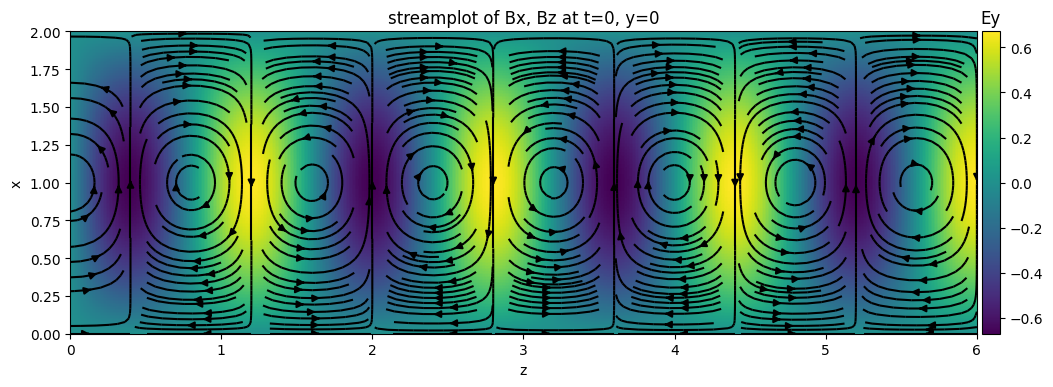

In [23]:
(Bz,Ex,Ey,Bx,By)=fields(1,1,xy,0,zy,0,1.5*wc(1,1))

fig=plt.figure(figsize=(12,4))
ax=fig.add_subplot(111)
im=plt.pcolormesh(zy,xy,Ey)
stm=plt.streamplot(zy,xy,Bz,Bx,density=2,color='k')
ax.set_aspect('equal')
plt.xlabel("z")
plt.ylabel("x")
plt.xlim([0,zmax])
plt.ylim([0,a])
plt.title("streamplot of Bx, Bz at t=0, y=0")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.title('Ey')
plt.show()

Now we look at the fields on the yz plane (namely, the x=0 plane).

In [28]:
ny=100
nz=600

y0=np.linspace(0,b,ny+1)
z0=np.linspace(0,zmax,nz+1)

# yz grid
zx,yx=np.meshgrid(z0,y0)

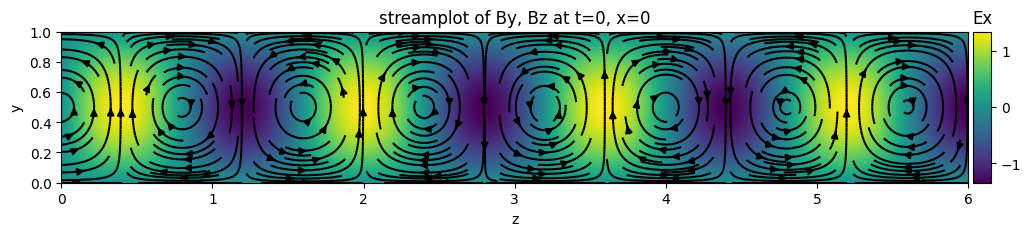

In [25]:
(Bz,Ex,Ey,Bx,By)=fields(1,1,0,yx,zx,0,1.5*wc(1,1))

fig=plt.figure(figsize=(12,4))
ax=fig.add_subplot(111)
im=plt.pcolormesh(zx,yx,Ex)
stm=plt.streamplot(zx,yx,Bz,By,density=2,color='k')
ax.set_aspect('equal')
plt.xlabel("z")
plt.ylabel("y")
plt.xlim([0,zmax])
plt.ylim([0,b])
plt.title("streamplot of By, Bz at t=0, x=0")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.title('Ex')
plt.show()

Here are a few more plots on the z=0.5 plane, for different $TE_{mn}$ modes.

$TE_{12}$

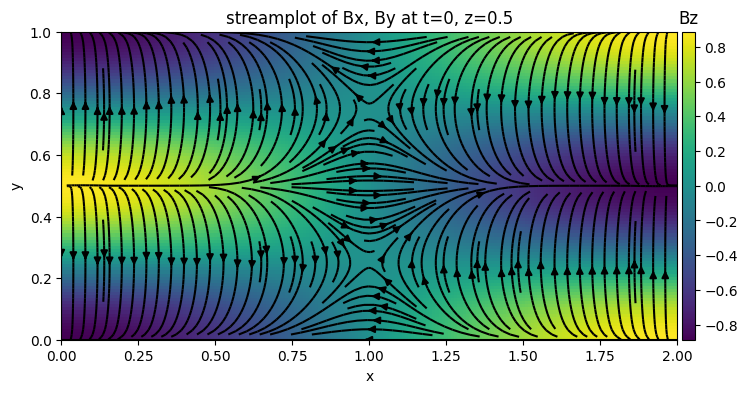

In [26]:
mm=1
nn=2
(Bz,Ex,Ey,Bx,By)=fields(mm,nn,xz,yz,0.5,0,1.5*wc(mm,nn))

fig=plt.figure(figsize=(9,4))
ax=fig.add_subplot(111)
im=plt.pcolormesh(xz,yz,Bz)
stm=plt.streamplot(xz,yz,Bx,By,density=2,color='k')
ax.set_aspect('equal')
plt.xlabel("x")
plt.ylabel("y")
plt.xlim([0,a])
plt.ylim([0,b])
plt.title("streamplot of Bx, By at t=0, z=0.5")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.title('Bz')
plt.show()

$TE_{22}$

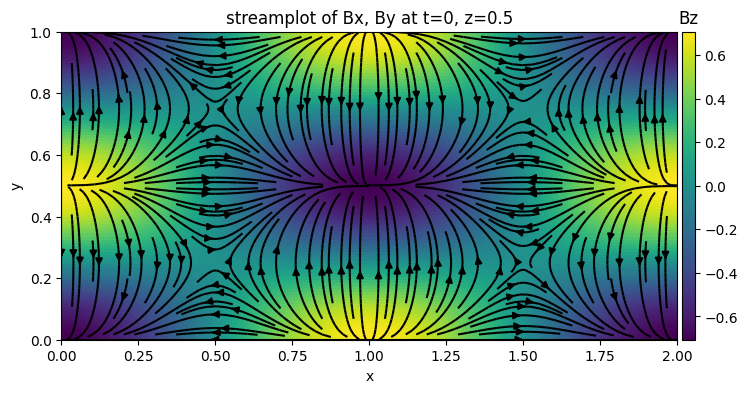

In [27]:
mm=2
nn=2
(Bz,Ex,Ey,Bx,By)=fields(mm,nn,xz,yz,0.5,0,1.5*wc(mm,nn))


fig=plt.figure(figsize=(9,4))
ax=fig.add_subplot(111)
im=plt.pcolormesh(xz,yz,Bz)
stm=plt.streamplot(xz,yz,Bx,By,density=2,color='k')
ax.set_aspect('equal')
plt.xlabel("x")
plt.ylabel("y")
plt.xlim([0,a])
plt.ylim([0,b])
plt.title("streamplot of Bx, By at t=0, z=0.5")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.title('Bz')
plt.show()

**Exercise 3**: plot out slices on z=const plane, y=const plane and x=const plane for a few more $TE_{mn}$ waves with different m, n values. What patterns can you discover?

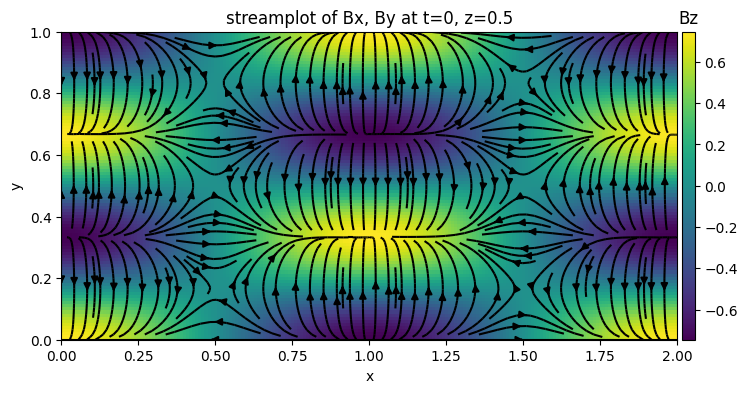

In [28]:
mm=2
nn=3
(Bz,Ex,Ey,Bx,By)=fields(mm,nn,xz,yz,0.5,0,1.5*wc(mm,nn))


fig=plt.figure(figsize=(9,4))
ax=fig.add_subplot(111)
im=plt.pcolormesh(xz,yz,Bz)
stm=plt.streamplot(xz,yz,Bx,By,density=2,color='k')
ax.set_aspect('equal')
plt.xlabel("x")
plt.ylabel("y")
plt.xlim([0,a])
plt.ylim([0,b])
plt.title("streamplot of Bx, By at t=0, z=0.5")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.title('Bz')
plt.show()

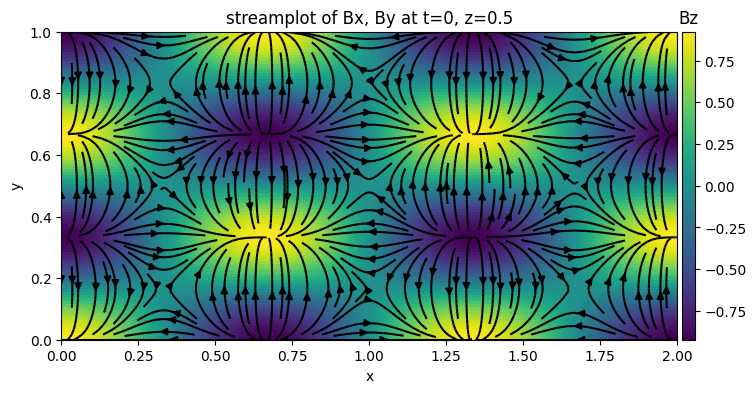

In [29]:
mm=3
nn=3
(Bz,Ex,Ey,Bx,By)=fields(mm,nn,xz,yz,0.5,0,1.5*wc(mm,nn))


fig=plt.figure(figsize=(9,4))
ax=fig.add_subplot(111)
im=plt.pcolormesh(xz,yz,Bz)
stm=plt.streamplot(xz,yz,Bx,By,density=2,color='k')
ax.set_aspect('equal')
plt.xlabel("x")
plt.ylabel("y")
plt.xlim([0,a])
plt.ylim([0,b])
plt.title("streamplot of Bx, By at t=0, z=0.5")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.title('Bz')
plt.show()

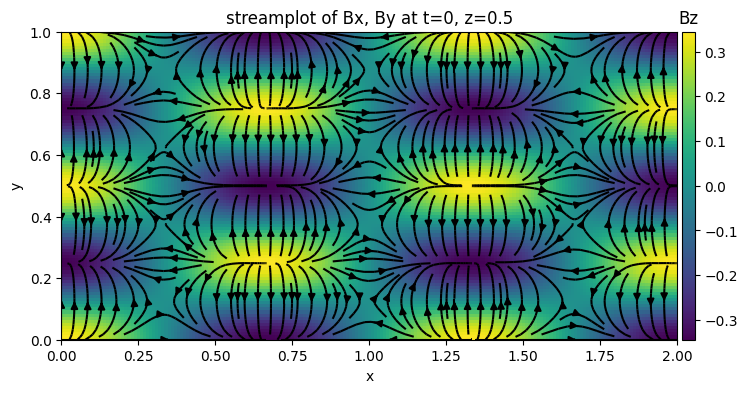

In [30]:
mm=3
nn=4
(Bz,Ex,Ey,Bx,By)=fields(mm,nn,xz,yz,0.5,0,1.5*wc(mm,nn))


fig=plt.figure(figsize=(9,4))
ax=fig.add_subplot(111)
im=plt.pcolormesh(xz,yz,Bz)
stm=plt.streamplot(xz,yz,Bx,By,density=2,color='k')
ax.set_aspect('equal')
plt.xlabel("x")
plt.ylabel("y")
plt.xlim([0,a])
plt.ylim([0,b])
plt.title("streamplot of Bx, By at t=0, z=0.5")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.title('Bz')
plt.show()

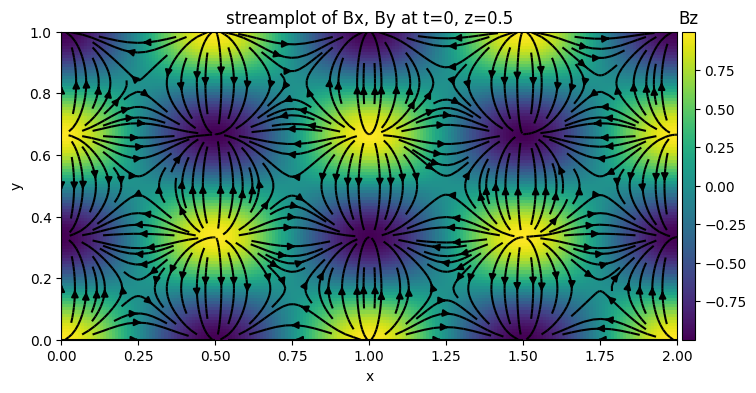

In [33]:
mm=4
nn=3
(Bz,Ex,Ey,Bx,By)=fields(mm,nn,xz,yz,0.5,0,1.5*wc(mm,nn))


fig=plt.figure(figsize=(9,4))
ax=fig.add_subplot(111)
im=plt.pcolormesh(xz,yz,Bz)
stm=plt.streamplot(xz,yz,Bx,By,density=2,color='k')
ax.set_aspect('equal')
plt.xlabel("x")
plt.ylabel("y")
plt.xlim([0,a])
plt.ylim([0,b])
plt.title("streamplot of Bx, By at t=0, z=0.5")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.title('Bz')
plt.show()

### Response:
I've noticed that the magnetic field lines form bubble-like structures in the xy plane. The tops and bottoms of the bubbles where the field lines emerge or go into correlate with local $B_{z}$ maxima. 

m seems to correlate with how many of these bubbles are stacked up along the y-axis, meanwhile n seems to correlate with how many bubbles are stacked up along the x-axis. This makes sense because for our images we use 
$$k=\sqrt{(1.5\omega_{mn})^2-\omega_{mn}^2} = \sqrt{0.5^2\omega_{mn}^2} = \frac{\pi}{2}\sqrt{(\frac{m}{a})^2+(\frac{n}{b})^2}$$

From this we see that k is correlated to $\frac{m}{a}$ and $\frac{n}{b}$. The wavenumber can be interpreted as the spatial frequency and so the equation for k is what causes this correlation between m/n and bubbles (or more accurately wave cycles) in the x/y axis.


## $TM_{mn}$ waves

**Exercise 4**: Work out the theory of TM modes for a rectangular wave guide. In particular, find the longitudinal electric field, the cutoff frequencies, and the wave and group velocities. Find the ratio of the lowest TM cutoff frequency to the lowest TE cutoff frequency, for a given wave guide. [Caution: What is the lowest TM mode?]

Now, write your own code to visualize the fields of the $TM_{mn}$ wave with the lowest m, n value. You can plot out slices on z=const, y=const, and x=const planes. Try to make time series animations of these slices.

Also plot some slices of higher m, n modes. What patterns can you find?

### Response: 
For a rectangular wave guide with a wave propogating in the $\hat{z}$ direction we get the following
$$E_z = E_0 sin(\frac{m\pi}{a}x) sin(\frac{n\pi}{b}y) cos(k*z-\omega*t)$$

$$ \omega_{mn}=c\pi\sqrt{(m/a)^2+(n/b)^2}$$

$$ v_w = \frac{c}{\sqrt{1-(\omega_{mn}/\omega)^2}}$$

$$v_g=c\sqrt{1-(\omega_{mn}/\omega)^2}$$

The lowest TM mode is $T_{11}$ resulting in the ratio
$$\frac{\omega_{TM}}{\omega_{TE}} = \sqrt{1+\frac{a^2}{b^2}}$$

In [72]:
a=2.0
b=1.0
def TM_wc(m,n):
    return np.pi*np.sqrt((m/a)**2+(n/b)**2)
def TM_fields(m,n,x,y,z,t,w):
    k=np.sqrt(w**2-TM_wc(m,n)**2)
    Ez=np.sin(m*np.pi*x/a)*np.sin(n*np.pi*y/b)*np.cos(k*z-w*t)
    Ex=w/TM_wc(m,n)**2*(n*np.pi/b)*np.cos(m*np.pi*x/a)*np.sin(n*np.pi*y/b)*np.sin(k*z-w*t)
    Ey=-w/TM_wc(m,n)**2*(m*np.pi/a)*np.sin(m*np.pi*x/a)*np.cos(n*np.pi*y/b)*np.sin(k*z-w*t)
    Bx=k/TM_wc(m,n)**2*(m*np.pi/a)*np.sin(m*np.pi*x/a)*np.cos(n*np.pi*y/b)*np.sin(k*z-w*t)
    By=k/TM_wc(m,n)**2*(n*np.pi/b)*np.cos(m*np.pi*x/a)*np.sin(n*np.pi*y/b)*np.sin(k*z-w*t)
    return (Ez,Ex,Ey,Bx,By)

### $T_{11}$

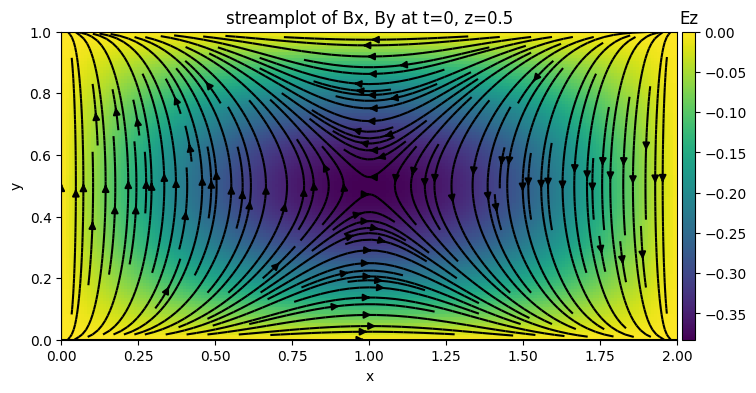

In [60]:
mm=1
nn=1
(Ez,Ex,Ey,Bx,By)=TM_fields(mm,nn,xz,yz,0.5,0,1.5*TM_wc(mm,nn))


fig=plt.figure(figsize=(9,4))
ax=fig.add_subplot(111)
im=plt.pcolormesh(xz,yz,Ez)
stm=plt.streamplot(xz,yz,Bx,By,density=2,color='k')
ax.set_aspect('equal')
plt.xlabel("x")
plt.ylabel("y")
plt.xlim([0,a])
plt.ylim([0,b])
plt.title("streamplot of Bx, By at t=0, z=0.5")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.title('Ez')
plt.show()

In [61]:
for i in range(0,nframe+1):
    mm=1
    nn=1
    (Ez,Ex,Ey,Bx,By)=TM_fields(mm,nn,xz,yz,0.5,i,1.5*TM_wc(mm,nn))
    fig=plt.figure(figsize=(12,4))
    ax=fig.add_subplot(111)
    im=plt.pcolormesh(xz,yz,Ez)
    stm=plt.streamplot(xz,yz,Bx,By,density=2,color='k')
    ax.set_aspect('equal')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim([0,a])
    plt.ylim([0,b])
    plt.title("streamplot of Bx, By at t=%.1f" % t[i])
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="2%", pad=0.05)
    plt.colorbar(im, cax=cax)
    plt.title('Ez')
    plt.tight_layout()
    plt.savefig(os.path.join(plotdir,'pt4slice%03d.png' % (i))) # the plots are saved as ./plot/slice000.png, ./plot/slice001.png, etc
    plt.close()

In [63]:
!ffmpeg -y -f image2 -r 6 -i plot/pt4slice%03d.png -c:v libx264 -crf 18 -pix_fmt yuv420p pt4BxBy.mp4

ffmpeg version 4.3.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 10.2.1 (GCC) 20200726
  configuration: --disable-static --enable-shared --enable-gpl --enable-version3 --enable-sdl2 --enable-fontconfig --enable-gnutls --enable-iconv --enable-libass --enable-libdav1d --enable-libbluray --enable-libfreetype --enable-libmp3lame --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libopus --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libsrt --enable-libtheora --enable-libtwolame --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libzimg --enable-lzma --enable-zlib --enable-gmp --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvo-amrwbenc --enable-libmysofa --enable-libspeex --enable-libxvid --enable-libaom --enable-libgsm --enable-librav1e --disable-w32threads --enable-libmfx --enable-ffnvcodec --enable-cuda-llvm --enable-cuvid --enable-d3d11va 

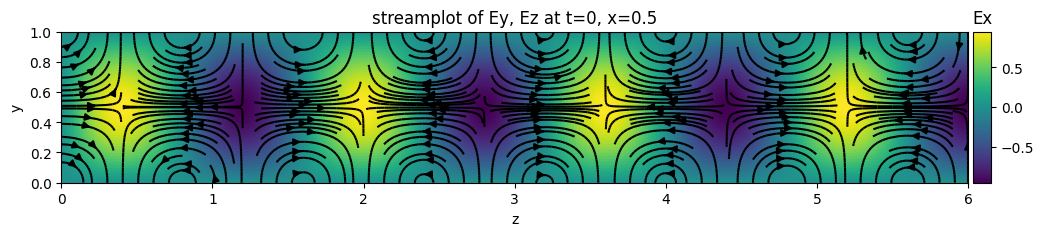

In [132]:
mm=1
nn=1



(Ez,Ex,Ey,Bx,By)=TM_fields(mm,nn,0.5,yx,zx,0,1.5*TM_wc(1,1))

fig=plt.figure(figsize=(12,4))
ax=fig.add_subplot(111)
im=plt.pcolormesh(zx,yx,Ex)
stm=plt.streamplot(zx,yx,Ez,Ey,density=2,color='k')

ax.set_aspect('equal')
plt.xlabel("z")
plt.ylabel("y")
plt.xlim([0,zmax])
plt.ylim([0,b])
plt.title("streamplot of Ey, Ez at t=0, x=0.5")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.title('Ex')
plt.show()

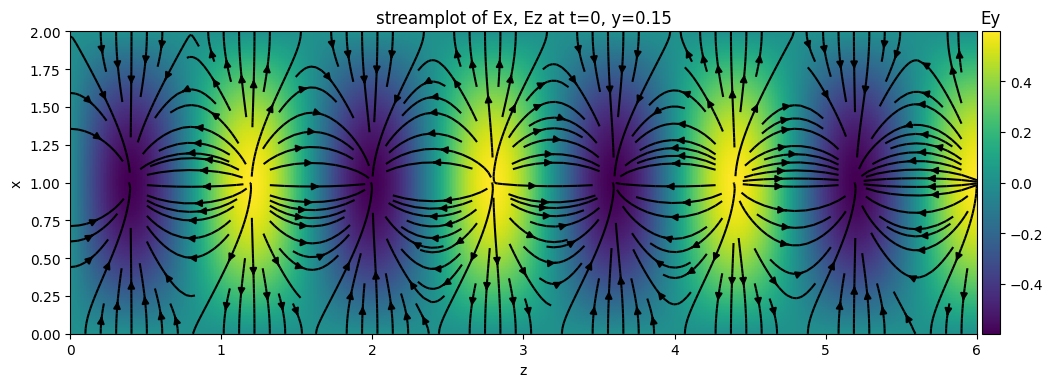

In [141]:
mm=1
nn=1
(Ez,Ex,Ey,Bx,By)=TM_fields(mm,nn,xy,0.15,zy,0,1.5*TM_wc(1,1))

fig=plt.figure(figsize=(12,4))
ax=fig.add_subplot(111)
im=plt.pcolormesh(zy,xy,Ey)
stm=plt.streamplot(zy,xy,Ez,Ex,density=2,color='k')
ax.set_aspect('equal')
plt.xlabel("z")
plt.ylabel("x")
plt.xlim([0,zmax])
plt.ylim([0,a])
plt.title("streamplot of Ex, Ez at t=0, y=0.15")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.title('Ey')
plt.show()

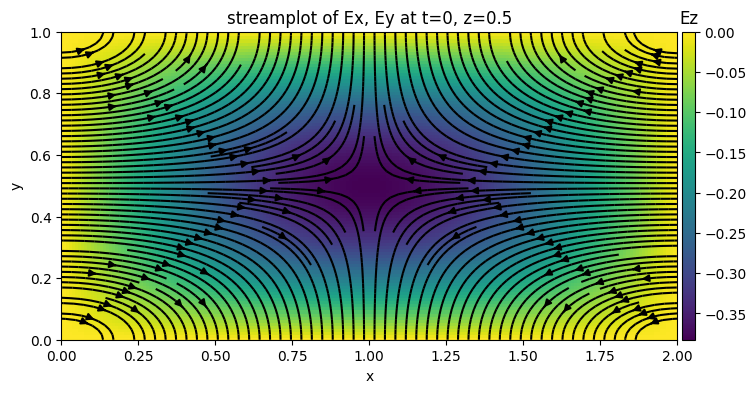

In [66]:
mm=1
nn=1
(Ez,Ex,Ey,Bx,By)=TM_fields(mm,nn,xz,yz,0.5,0,1.5*TM_wc(mm,nn))


fig=plt.figure(figsize=(9,4))
ax=fig.add_subplot(111)
im=plt.pcolormesh(xz,yz,Ez)
stm=plt.streamplot(xz,yz,Ex,Ey,density=2,color='k')
ax.set_aspect('equal')
plt.xlabel("x")
plt.ylabel("y")
plt.xlim([0,a])
plt.ylim([0,b])
plt.title("streamplot of Ex, Ey at t=0, z=0.5")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.title('Ez')
plt.show()

In [67]:
for i in range(0,nframe+1):
    mm=1
    nn=1
    (Ez,Ex,Ey,Bx,By)=TM_fields(mm,nn,xz,yz,0.5,i,1.5*TM_wc(mm,nn))
    fig=plt.figure(figsize=(12,4))
    ax=fig.add_subplot(111)
    im=plt.pcolormesh(xz,yz,Ez)
    stm=plt.streamplot(xz,yz,Ex,Ey,density=2,color='k')
    ax.set_aspect('equal')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim([0,a])
    plt.ylim([0,b])
    plt.title("streamplot of Ex, Ey at t=%.1f" % t[i])
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="2%", pad=0.05)
    plt.colorbar(im, cax=cax)
    plt.title('Ez')
    plt.tight_layout()
    plt.savefig(os.path.join(plotdir,'pt4Eslice%03d.png' % (i))) # the plots are saved as ./plot/slice000.png, ./plot/slice001.png, etc
    plt.close()

In [68]:
!ffmpeg -y -f image2 -r 6 -i plot/pt4Eslice%03d.png -c:v libx264 -crf 18 -pix_fmt yuv420p pt4ExEy.mp4

ffmpeg version 4.3.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 10.2.1 (GCC) 20200726
  configuration: --disable-static --enable-shared --enable-gpl --enable-version3 --enable-sdl2 --enable-fontconfig --enable-gnutls --enable-iconv --enable-libass --enable-libdav1d --enable-libbluray --enable-libfreetype --enable-libmp3lame --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libopus --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libsrt --enable-libtheora --enable-libtwolame --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libzimg --enable-lzma --enable-zlib --enable-gmp --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvo-amrwbenc --enable-libmysofa --enable-libspeex --enable-libxvid --enable-libaom --enable-libgsm --enable-librav1e --disable-w32threads --enable-libmfx --enable-ffnvcodec --enable-cuda-llvm --enable-cuvid --enable-d3d11va 

### $T_{12}$

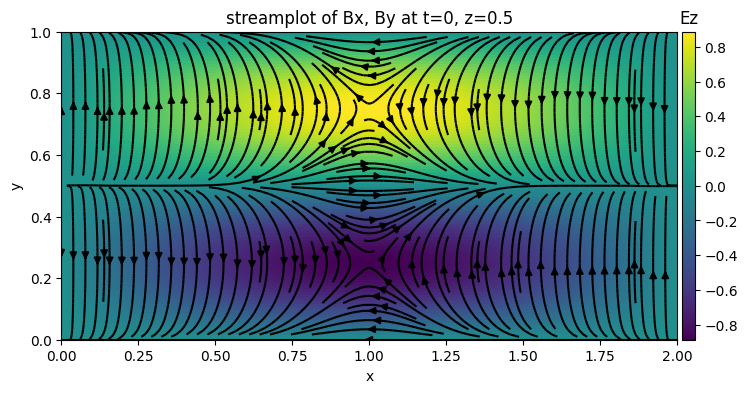

In [74]:
mm=1
nn=2
(Ez,Ex,Ey,Bx,By)=TM_fields(mm,nn,xz,yz,0.5,0,1.5*TM_wc(mm,nn))


fig=plt.figure(figsize=(9,4))
ax=fig.add_subplot(111)
im=plt.pcolormesh(xz,yz,Ez)
stm=plt.streamplot(xz,yz,Bx,By,density=2,color='k')
ax.set_aspect('equal')
plt.xlabel("x")
plt.ylabel("y")
plt.xlim([0,a])
plt.ylim([0,b])
plt.title("streamplot of Bx, By at t=0, z=0.5")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.title('Ez')
plt.show()

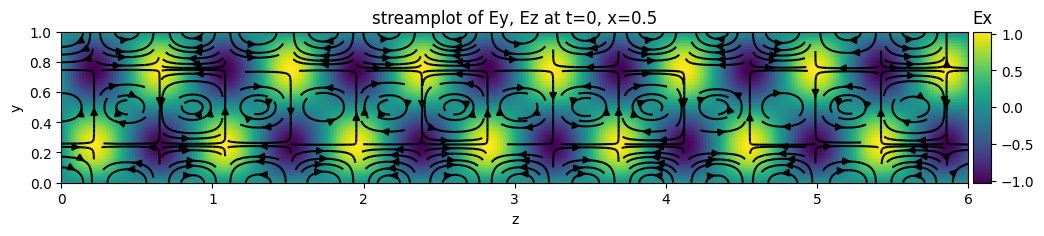

In [134]:
mm=1
nn=2

(Ez,Ex,Ey,Bx,By)=TM_fields(mm,nn,0.5,yx,zx,0,1.5*TM_wc(mm,nn))

fig=plt.figure(figsize=(12,4))
ax=fig.add_subplot(111)
im=plt.pcolormesh(zx,yx,Ex)
stm=plt.streamplot(zx,yx,Ez,Ey,density=2,color='k')

ax.set_aspect('equal')
plt.xlabel("z")
plt.ylabel("y")
plt.xlim([0,zmax])
plt.ylim([0,b])
plt.title("streamplot of Ey, Ez at t=0, x=0.5")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.title('Ex')
plt.show()

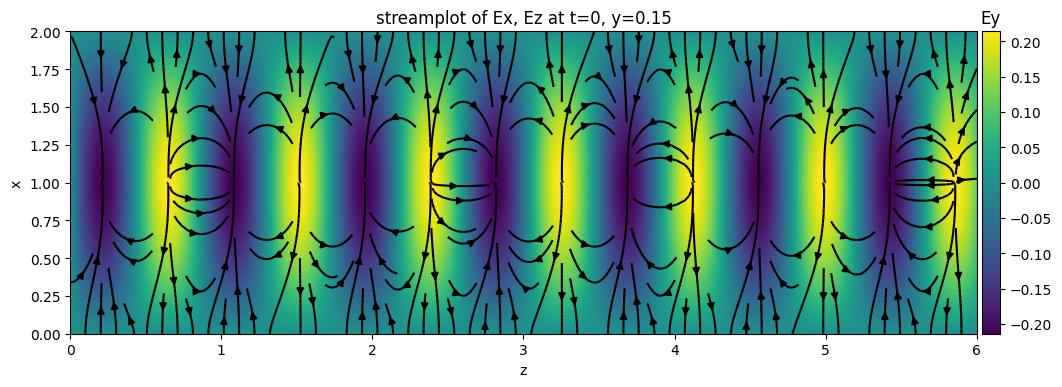

In [142]:
mm=1
nn=2
(Ez,Ex,Ey,Bx,By)=TM_fields(mm,nn,xy,0.15,zy,0,1.5*TM_wc(mm,nn))

fig=plt.figure(figsize=(12,4))
ax=fig.add_subplot(111)
im=plt.pcolormesh(zy,xy,Ey)
stm=plt.streamplot(zy,xy,Ez,Ex,density=2,color='k')
ax.set_aspect('equal')
plt.xlabel("z")
plt.ylabel("x")
plt.xlim([0,zmax])
plt.ylim([0,a])
plt.title("streamplot of Ex, Ez at t=0, y=0.15")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.title('Ey')
plt.show()

### $T_{22}$

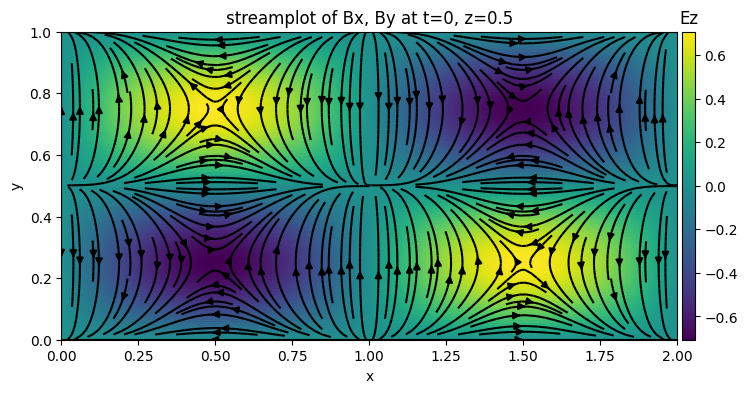

In [76]:
mm=2
nn=2
(Ez,Ex,Ey,Bx,By)=TM_fields(mm,nn,xz,yz,0.5,0,1.5*TM_wc(mm,nn))


fig=plt.figure(figsize=(9,4))
ax=fig.add_subplot(111)
im=plt.pcolormesh(xz,yz,Ez)
stm=plt.streamplot(xz,yz,Bx,By,density=2,color='k')
ax.set_aspect('equal')
plt.xlabel("x")
plt.ylabel("y")
plt.xlim([0,a])
plt.ylim([0,b])
plt.title("streamplot of Bx, By at t=0, z=0.5")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.title('Ez')
plt.show()

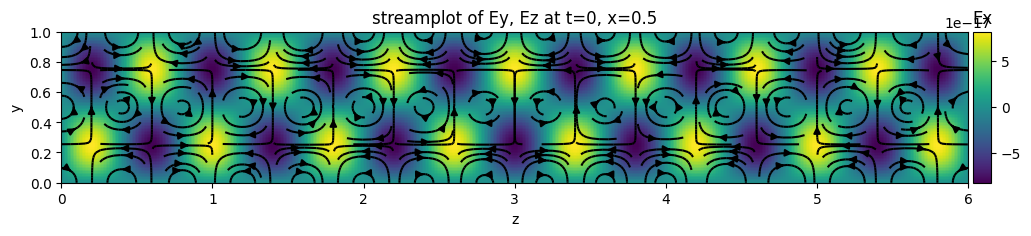

In [136]:
mm=2
nn=2

(Ez,Ex,Ey,Bx,By)=TM_fields(mm,nn,0.5,yx,zx,0,1.5*TM_wc(mm,nn))

fig=plt.figure(figsize=(12,4))
ax=fig.add_subplot(111)
im=plt.pcolormesh(zx,yx,Ex)
stm=plt.streamplot(zx,yx,Ez,Ey,density=2,color='k')

ax.set_aspect('equal')
plt.xlabel("z")
plt.ylabel("y")
plt.xlim([0,zmax])
plt.ylim([0,b])
plt.title("streamplot of Ey, Ez at t=0, x=0.5")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.title('Ex')
plt.show()

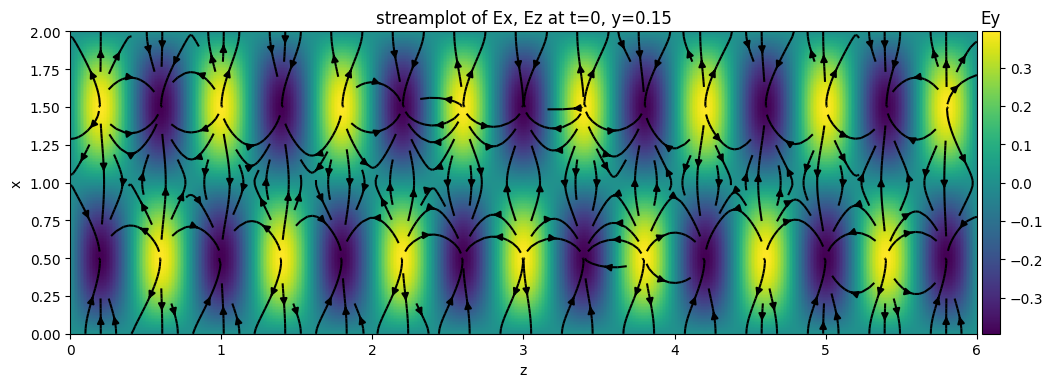

In [143]:
mm=2
nn=2
(Ez,Ex,Ey,Bx,By)=TM_fields(mm,nn,xy,0.15,zy,0,1.5*TM_wc(mm,nn))

fig=plt.figure(figsize=(12,4))
ax=fig.add_subplot(111)
im=plt.pcolormesh(zy,xy,Ey)
stm=plt.streamplot(zy,xy,Ez,Ex,density=2,color='k')
ax.set_aspect('equal')
plt.xlabel("z")
plt.ylabel("x")
plt.xlim([0,zmax])
plt.ylim([0,a])
plt.title("streamplot of Ex, Ez at t=0, y=0.15")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.title('Ey')
plt.show()

### Response:
I notice that same as before the m value seems to correspond with the number of verticle magnetic bubbles meanwhile the n value corresponds with the number of horizontal magnetic bubbles. Additionally, we seem to see that for the electric field there's a similar phenomena where m seems to correlate to the number of rows stacked upon eachother of varying electric field, while n correlates with the number of alternating electric field pairs.

## Bonus problem: TEM wave in a coaxial transmission line

**Bonus exercise**: write your own code to visualize the fields of the TEM wave in a coaxial transimission line (see section 9.5.3 of the textbook for the derivation of the fields). You can plot out slices on z=const planes and $\phi$=const planes. Try to make animations of the time series of fields on a fixed plane.

### Response:
$$ \textbf{E} = \frac{Acos(kz-\omega t)}{r} \hat{r}$$
$$ \textbf{B} = \frac{Acos(kz-\omega t)}{r} \hat{\phi}$$

In [227]:
#the function you make has to do a mask
a=2.0
b=1.0
amp = 1.0
w=5.0
def coax_fields(r,ph,z,t):
    k=w
    Er=(amp*np.cos(k*z-w*t)/r)
    #honestly just using it as a zero numpy array of correct size
    Erx=(amp*np.cos(k*z-w*t)/r)*(np.cos(ph))*0
    #Not 100% sure on these values besides Bph
    Ery=(amp*np.cos(k*z-w*t)/r)*(np.sin(ph))
    Bph=(amp*np.cos(k*z-w*t)/r)
    Bphx=(amp*np.cos(k*z-w*t)/r)*(-np.sin(ph))
    Bphy=(amp*np.cos(k*z-w*t)/r)*(np.cos(ph))
    return (Er,Erx,Ery,Bph,Bphx, Bphy)

In [228]:
nx=200
ny=200

r_range = np.arange(b,a+((a-b)/(nx-1)),(a-b)/(nx-1))
xr = np.linspace(-a,a,nx)
yr = np.linspace(-a,a,nx)
xx,yy = np.meshgrid(xr,yr)
zr = np.linspace(0,6,nx)
rr, zz = np.meshgrid(r_range,zr)
phi = 2*np.pi*rr


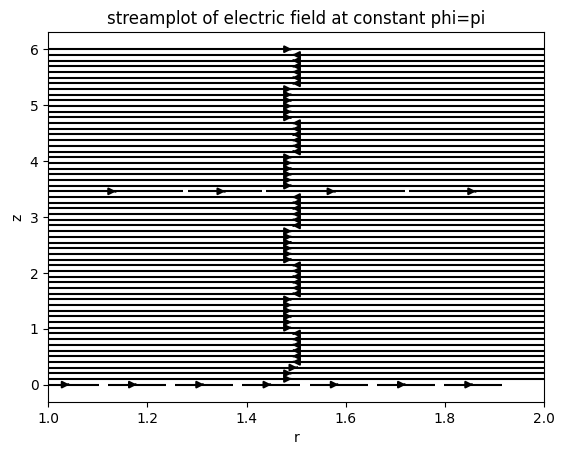

In [233]:
(Er,Erx,Ery,Bph,Bphx,Bphy)=coax_fields(rr,np.pi,zz,0)
plt.streamplot(rr,zz,Er,Erx,density=2,color='k')
#plt.pcolormesh(rr,zz,Bph)
plt.xlabel("r")
plt.ylabel("z")
plt.title("streamplot of electric field at constant phi=pi")
plt.show()

In [239]:
for i in range(0,nframe+1):
    (Er,Erx,Ery,Bph,Bphx,Bphy)=coax_fields(rr,np.pi,zz,i)
    plt.streamplot(rr,zz,Er,Erx,density=2,color='k')
    #plt.pcolormesh(rr,zz,Bph)
    plt.xlabel("r")
    plt.ylabel("z")
    plt.title("streamplot of electric field at constant phi=pi")
    plt.savefig(os.path.join(plotdir,'pt5Estream%03d.png' % (i))) # the plots are saved as ./plot/slice000.png, ./plot/slice001.png, etc
    plt.close()

In [240]:
!ffmpeg -y -f image2 -r 6 -i plot/pt5Estream%03d.png -c:v libx264 -crf 18 -pix_fmt yuv420p pt5stream.mp4

ffmpeg version 4.3.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 10.2.1 (GCC) 20200726
  configuration: --disable-static --enable-shared --enable-gpl --enable-version3 --enable-sdl2 --enable-fontconfig --enable-gnutls --enable-iconv --enable-libass --enable-libdav1d --enable-libbluray --enable-libfreetype --enable-libmp3lame --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libopus --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libsrt --enable-libtheora --enable-libtwolame --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libzimg --enable-lzma --enable-zlib --enable-gmp --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvo-amrwbenc --enable-libmysofa --enable-libspeex --enable-libxvid --enable-libaom --enable-libgsm --enable-librav1e --disable-w32threads --enable-libmfx --enable-ffnvcodec --enable-cuda-llvm --enable-cuvid --enable-d3d11va 

C:\Users\teg\miniconda3\envs\astroresearch\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  after removing the cwd from sys.path.


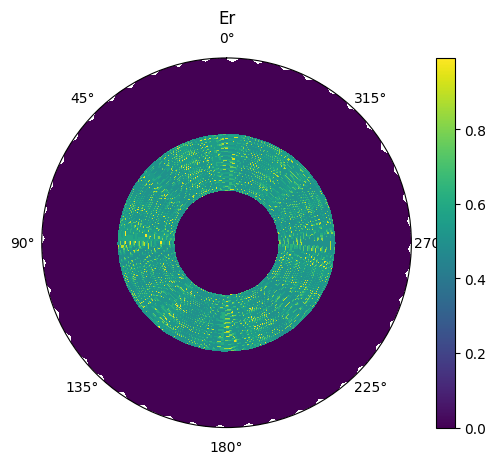

In [225]:
(Er,Erx,Ery,Bph,Bphx,Bphy)=coax_fields(rr,phi,5,0)
Er[np.sqrt(xr**2+yr**2)>b]=0
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
pic=ax.pcolormesh(Er)

ax.set_yticklabels([])
#ax.grid(True)
ax.set_theta_zero_location('N')

fig.colorbar(pic)
plt.title("Er")
plt.show()

In [236]:
for i in range(0,nframe+1):
    (Er,Erx,Ery,Bph,Bphx,Bphy)=coax_fields(rr,phi,5,i)
    Er[np.sqrt(xr**2+yr**2)>b]=0
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
    pic=ax.pcolormesh(Er)

    ax.set_yticklabels([])
    #ax.grid(True)
    ax.set_theta_zero_location('N')

    fig.colorbar(pic)
    plt.title("Er")
    plt.savefig(os.path.join(plotdir,'pt5Ecolormap%03d.png' % (i))) # the plots are saved as ./plot/slice000.png, ./plot/slice001.png, etc
    plt.close()

C:\Users\teg\miniconda3\envs\astroresearch\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  """


In [237]:
!ffmpeg -y -f image2 -r 6 -i plot/pt5Ecolormap%03d.png -c:v libx264 -crf 18 -pix_fmt yuv420p pt5colormap.mp4

ffmpeg version 4.3.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 10.2.1 (GCC) 20200726
  configuration: --disable-static --enable-shared --enable-gpl --enable-version3 --enable-sdl2 --enable-fontconfig --enable-gnutls --enable-iconv --enable-libass --enable-libdav1d --enable-libbluray --enable-libfreetype --enable-libmp3lame --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libopus --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libsrt --enable-libtheora --enable-libtwolame --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libzimg --enable-lzma --enable-zlib --enable-gmp --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvo-amrwbenc --enable-libmysofa --enable-libspeex --enable-libxvid --enable-libaom --enable-libgsm --enable-librav1e --disable-w32threads --enable-libmfx --enable-ffnvcodec --enable-cuda-llvm --enable-cuvid --enable-d3d11va 